In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import sum, col, min, max, to_timestamp, to_date, date_format, round
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score, explained_variance_score

In [0]:
# Install regression algorithm
#%pip install xgboost

In [0]:
# Load data into dataframes
dfR1_o = sqlContext.read.load('/FileStore/tables/restaurant_1_orders.csv', format='csv', header=True, inferSchema=True)

## Data exploration

In [0]:
# First glance over data using display() function
display(dfR1_o)

Order Number Order Date Item Name Quantity Product Price Total products 16118 03/08/2019 20:25 Plain Papadum 2 0.8 6 16118 03/08/2019 20:25 King Prawn Balti 1 12.95 6 16118 03/08/2019 20:25 Garlic Naan 1 2.95 6 16118 03/08/2019 20:25 Mushroom Rice 1 3.95 6 16118 03/08/2019 20:25 Paneer Tikka Masala 1 8.95 6 16118 03/08/2019 20:25 Mango Chutney 1 0.5 6 16117 03/08/2019 20:17 Plain Naan 1 2.6 7 16117 03/08/2019 20:17 Mushroom Rice 1 3.95 7 16117 03/08/2019 20:17 Tandoori Chicken (1/4) 1 4.95 7 16117 03/08/2019 20:17 Vindaloo - Lamb 1 7.95 7 16117 03/08/2019 20:17 Chapati 1 1.95 7 16117 03/08/2019 20:17 Lamb Tikka 1 4.95 7 16117 03/08/2019 20:17 Saag Paneer 1 5.95 7 16116 03/08/2019 20:09 Aloo Chaat 1 4.95 5 16116 03/08/2019 20:09 Chicken Pakora 1 5.95 5 16116 03/08/2019 20:09 Chicken Chilli Garlic 1 9.95 5 16116 03/08/2019 20:09 Lamb Biryani 1 9.95 5 16116 03/08/2019 20:09 Keema Naan 1 2.95 5 16115 03/08/2019 20:01 Chicken Pakora 1 5.95 7 16115 03/08/2019 20:01 Plain Papadum 1 0.8 7 16115 03/08/2019 20:01 Mango Chutney 1 0.5 7 16115 03/08/2019 20:01 Red Sauce 1 0.5 7 16115 03/08/2019 20:01 Korma - Prawn 1 9.95 7 16115 03/08/2019 20:01 Peshwari Naan 1 2.95 7 16115 03/08/2019 20:01 Pilau Rice 1 2.95 7 16114 03/08/2019 19:44 Chicken Balti 1 9.95 2 16114 03/08/2019 19:44 Special Fried Rice 2 3.95 2 16113 03/08/2019 19:42 Chicken Tikka Masala 1 8.95 5 16113 03/08/2019 19:42 Curry - Lamb 1 7.95 5 16113 03/08/2019 19:42 Pilau Rice 1 2.95 5 16113 03/08/2019 19:42 Peshwari Naan 1 2.95 5 16113 03/08/2019 19:42 Plain Papadum 1 0.8 5 16112 03/08/2019 19:41 Plain Papadum 2 0.8 4 16112 03/08/2019 19:41 Vegetable Rice 1 3.95 4 16112 03/08/2019 19:41 Saag - Prawn 1 9.95 4 16112 03/08/2019 19:41 Tandoori Chicken Masala 1 8.95 4 16111 03/08/2019 19:29 Pilau Rice 1 2.95 4 16111 03/08/2019 19:29 Lamb Tikka Chilli Masala 1 8.95 4 16111 03/08/2019 19:29 Peshwari Naan 1 2.95 4 16111 03/08/2019 19:29 Saag Aloo 1 5.95 4 16110 03/08/2019 19:28 Aloo Gobi 1 5.95 8 16110 03/08/2019 19:28 Bhindi Bhajee 1 5.95 8 16110 03/08/2019 19:28 Saag Paneer 1 5.95 8 16110 03/08/2019 19:28 Mint Sauce 2 0.5 8 16110 03/08/2019 19:28 Chicken Biryani 1 9.95 8 16110 03/08/2019 19:28 Garlic Naan 1 2.95 8 16110 03/08/2019 19:28 Plain Naan 1 2.6 8 16110 03/08/2019 19:28 Tandoori Chicken Masala 1 8.95 8 16109 03/08/2019 19:26 Plain Papadum 4 0.8 7 16109 03/08/2019 19:26 Red Sauce 2 0.5 7 16109 03/08/2019 19:26 Chicken Tikka Masala 1 8.95 7 16109 03/08/2019 19:26 Madras - Chicken Tikka 1 7.95 7 16109 03/08/2019 19:26 Mushroom Rice 2 3.95 7 16109 03/08/2019 19:26 Garlic Naan 1 2.95 7 16109 03/08/2019 19:26 Bombay Aloo 1 5.95 7 16108 03/08/2019 19:25 Onion Bhajee 1 3.95 15 16108 03/08/2019 19:25 Sheek Kebab 1 4.95 15 16108 03/08/2019 19:25 Plain Papadum 8 0.8 15 16108 03/08/2019 19:25 Mango Chutney 2 0.5 15 16108 03/08/2019 19:25 Mint Sauce 2 0.5 15 16108 03/08/2019 19:25 Onion Chutney 1 0.5 15 16108 03/08/2019 19:25 Chicken Tikka (Main) 1 8.95 15 16108 03/08/2019 19:25 Korma - Chicken 1 8.95 15 16108 03/08/2019 19:25 Chicken Tikka Masala 1 8.95 15 16108 03/08/2019 19:25 Plain Rice 1 2.95 15 16108 03/08/2019 19:25 Pilau Rice 1 2.95 15 16108 03/08/2019 19:25 Keema Naan 2 2.95 15 16108 03/08/2019 19:25 French Fries 1 3.95 15 16108 03/08/2019 19:25 Chicken Biryani 1 9.95 15 16108 03/08/2019 19:25 Mushroom Rice 1 3.95 15 16107 03/08/2019 19:16 Onion Bhajee 1 3.95 4 16107 03/08/2019 19:16 Korma - Chicken 1 8.95 4 16107 03/08/2019 19:16 Peshwari Naan 1 2.95 4 16107 03/08/2019 19:16 Pilau Rice 1 2.95 4 16106 03/08/2019 18:37 Chicken Tikka (Main) 1 8.95 3 16106 03/08/2019 18:37 Chicken Tikka Masala 1 8.95 3 16106 03/08/2019 18:37 Meat Samosa 1 3.95 3 16105 03/08/2019 18:36 Plain Papadum 2 0.8 9 16105 03/08/2019 18:36 Mango Chutney 1 0.5 9 16105 03/08/2019 18:36 Mint Sauce 1 0.5 9 16105 03/08/2019 18:36 Red Sauce 1 0.5 9 16105 03/08/2019 18:36 Keema Rice 1 3.95 9 16105 03/08/2019 18:36 Keema Naan 1 2.95 9 16105 03/08/2019 18:36 Chicken Chilli Garlic 1 9.95 9 16105 03/08/2019 18:36 Lamb Hari 

In [0]:
# Grouping by Item Name
display(dfR1_o.groupBy("Item Name").sum().orderBy("sum(Total Products)",ascending=0))

Item Name sum(Order Number) sum(Quantity) sum(Product Price) sum(Total products) Pilau Rice 43450300 6367 13926.95000000106 31314 Plain Papadum 33504914 10648 2878.4000000001065 27140 Plain Naan 33978950 4983 9757.80000000069 24276 Onion Bhajee 21818221 2749 9487.899999999972 17293 Garlic Naan 23930176 3318 7752.599999999671 17143 Mango Chutney 19194045 2504 1035.0 16991 Plain Rice 21315452 2964 6988.549999999718 15345 Chicken Tikka Masala 19303060 2473 19090.350000000766 14439 Mint Sauce 13604320 1840 731.5 12615 Bombay Aloo 16083952 1831 10424.400000000096 12373 Peshwari Naan 14158689 1734 4528.24999999987 10898 Mushroom Rice 13326354 1615 5735.399999999847 10286 Keema Naan 12192201 1520 4017.899999999901 9754 Onion Chutney 9310794 1291 516.5 9072 Saag Aloo 10811297 1234 7104.2999999998565 8958 Chapati 10534881 1935 2281.500000000012 7933 Korma 6862430 1370 10854.95000000009 7838 Meat Samosa 10713819 1411 4708.399999999894 7739 Butter Chicken 9273221 1068 9751.00000000001 6427 Red Sauce 6081461 728 333.0 6168 Korma - Chicken 12050839 1091 8439.849999999902 6167 Madras 4790890 851 6506.749999999909 5477 Chicken Tikka (Main) 7326042 905 7204.749999999903 5442 Chicken Tikka 6371270 728 3432.349999999962 4563 Tandoori Mixed Grill 5967235 716 7958.699999999916 4275 Special Fried Rice 5848598 713 2551.6999999999935 4211 Aloo Gobi 5641994 620 3659.249999999962 4187 Sheek Kebab 4827884 589 2682.8999999999896 3762 Mixed Starter 4790871 586 3218.9499999999753 3730 Spicy Papadum 4158488 784 366.40000000000305 3640 French Fries 4929234 560 2073.7500000000155 3638 Chicken Biryani 5723874 771 6477.449999999926 3548 Lime Pickle 3264912 386 183.0 3544 Saag Paneer 4587769 537 3010.6999999999816 3494 Curry 3121331 639 4367.999999999957 3449 Tarka Dall 4712374 567 3117.7999999999784 3413 Chicken Tikka Jalfrezi 4446813 481 4170.699999999964 3228 Bhuna 2909536 524 4507.59999999996 3164 Madras - Chicken 6157790 508 3855.749999999967 2966 Tandoori Roti 4243825 593 1183.0000000000007 2818 Keema Rice 3286403 401 1445.7000000000096 2705 Mushroom Bhajee 2894206 335 1969.4500000000103 2670 Chicken Tikka Biryani 4218265 500 5080.799999999956 2601 Chicken Shashlick 3230696 375 3522.2999999999797 2553 Dhansak 2093986 387 3482.09999999998 2548 Paratha 3430845 474 1100.3500000000076 2544 Prawn Puree 3428285 416 1856.2500000000114 2528 Lamb Biryani 4647535 602 5124.249999999951 2466 Chana Masala 3412597 400 2255.0500000000047 2443 Curry - Chicken 4592200 457 2861.9999999999895 2404 Chicken Chaat 2980553 384 1668.1500000000096 2396 Chicken Pakora 2771609 318 1832.6000000000092 2353 Royal Paneer 3382559 380 2100.3500000000095 2276 Vegetable Rice 3695025 459 1528.6500000000106 2272 Chicken Balti 3695133 387 3721.299999999976 2173 Raitha 2418755 306 799.450000000003 2034 Vegetable Roll 2490432 311 1415.7000000000073 2005 Egg Rice 2773169 333 1212.650000000007 1990 Chicken Tikka Chilli Masala 2530522 337 2684.999999999994 1968 Tandoori Chicken (Main) 3024905 404 3105.6499999999855 1964 Onion Rice 2157636 258 951.950000000004 1882 Vegetable Biryani 3247368 365 3183.999999999986 1813 Aloo Chaat 2599628 316 1410.7500000000073 1808 Mixed Vegetable Curry 2490712 264 1552.950000000007 1724 Masala Sauce 1935599 214 829.5000000000026 1709 Vindaloo 1411589 284 2070.300000000008 1672 Chicken Tikka Balti 2507004 288 3055.0499999999893 1667 Saag Rice 2095257 239 904.5500000000035 1631 Garlic Rice 1901290 234 861.100000000003 1620 Lamb Tikka 2321668 247 1188.0000000000052 1598 Lemon Rice 1953337 224 801.8500000000023 1553 Bhindi Bhajee 2343338 247 1398.250000000006 1553 Chicken Tikka Pasanda 2018501 223 1951.1000000000067 1534 Saag Bhajee 2023389 232 1380.4000000000058 1531 Chicken Tikka Garlic 1516112 205 1798.950000000006 1530 Korma Sauce 1909013 223 853.2000000000029 1524 Tandoori Chicken Masala 1829437 212 1852.6500000000062 1479 Bhuna - Chicken 2534948 211 1772.1000000000058 1385 Dupiaza 1066103 191 1677.7000000000053 1381 Paneer Tikka Masala 2229521 258 2067.45000000000

##Data cleaning

### Checking for null values


In [0]:
# Create an empty list to store info about null values
nulls = []

# Iterate over each column in the DataFrame, for reach check if it is null, convert booleans to integer and then sum all values in a column -> if no null, sum will be 0
for column in dfR1_o.columns:
    nulls_sum = sum(col(column).isNull().cast("int")).alias(column) # alias to name the new column in expr the same as the original
    nulls.append(nulls_sum)

# Use the list of expressions in the select statement to build a new DataFrame
nulls_df = dfR1_o.select(*nulls)

# Display the DataFrame with the count of NULL values for each column
nulls_df.show()

+------------+----------+---------+--------+-------------+--------------+
|Order Number|Order Date|Item Name|Quantity|Product Price|Total products|
+------------+----------+---------+--------+-------------+--------------+
|           0|         0|        0|       0|            0|             0|
+------------+----------+---------+--------+-------------+--------------+



### Checking for duplicates

In [0]:
# To check for duplicates, create a new DF without duplicates, then count rows in both new and old DF and compare
unique_df1 = dfR1_o.dropDuplicates()
total_count = dfR1_o.count()
unique_count = unique_df1.count()
duplicate_count = total_count - unique_count
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 97


In [0]:
# Easiest way to see data types
dfR1_o.printSchema()

root
 |-- Order Number: integer (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Item Name: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Product Price: double (nullable = true)
 |-- Total products: integer (nullable = true)



### Formatting

We can see that Order Date is a string, which won't work. So format to datetime instead.

In [0]:
# Convert the string column "date_str" into a timestamp column "datetime"
df = dfR1_o.withColumn("Timestamp", to_timestamp(col("Order Date"), "dd/MM/yyyy HH:mm"))

# Delete string date column
df = df.drop('Order Date')

# Separate date and time into separate varibles
df = df.withColumn("Order Date", to_date(col("Timestamp")))
df = df.withColumn("Order Time", date_format(col("Timestamp"), "HH:mm"))

# Calculating total value of order as product prince * number of products, round up to 2 decimals
df = df.withColumn("Value", round(col("Product Price") * col("Total products"), 2))

# Check data
display(df)

Order Number Item Name Quantity Product Price Total products Timestamp Order Date Order Time Value 16118 Plain Papadum 2 0.8 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 4.8 16118 King Prawn Balti 1 12.95 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 77.7 16118 Garlic Naan 1 2.95 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 17.7 16118 Mushroom Rice 1 3.95 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 23.7 16118 Paneer Tikka Masala 1 8.95 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 53.7 16118 Mango Chutney 1 0.5 6 2019-08-03T20:25:00.000+0000 2019-08-03 20:25 3.0 16117 Plain Naan 1 2.6 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 18.2 16117 Mushroom Rice 1 3.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 27.65 16117 Tandoori Chicken (1/4) 1 4.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 34.65 16117 Vindaloo - Lamb 1 7.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 55.65 16117 Chapati 1 1.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 13.65 16117 Lamb Tikka 1 4.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 34.65 16117 Saag Paneer 1 5.95 7 2019-08-03T20:17:00.000+0000 2019-08-03 20:17 41.65 16116 Aloo Chaat 1 4.95 5 2019-08-03T20:09:00.000+0000 2019-08-03 20:09 24.75 16116 Chicken Pakora 1 5.95 5 2019-08-03T20:09:00.000+0000 2019-08-03 20:09 29.75 16116 Chicken Chilli Garlic 1 9.95 5 2019-08-03T20:09:00.000+0000 2019-08-03 20:09 49.75 16116 Lamb Biryani 1 9.95 5 2019-08-03T20:09:00.000+0000 2019-08-03 20:09 49.75 16116 Keema Naan 1 2.95 5 2019-08-03T20:09:00.000+0000 2019-08-03 20:09 14.75 16115 Chicken Pakora 1 5.95 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 41.65 16115 Plain Papadum 1 0.8 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 5.6 16115 Mango Chutney 1 0.5 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 3.5 16115 Red Sauce 1 0.5 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 3.5 16115 Korma - Prawn 1 9.95 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 69.65 16115 Peshwari Naan 1 2.95 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 20.65 16115 Pilau Rice 1 2.95 7 2019-08-03T20:01:00.000+0000 2019-08-03 20:01 20.65 16114 Chicken Balti 1 9.95 2 2019-08-03T19:44:00.000+0000 2019-08-03 19:44 19.9 16114 Special Fried Rice 2 3.95 2 2019-08-03T19:44:00.000+0000 2019-08-03 19:44 7.9 16113 Chicken Tikka Masala 1 8.95 5 2019-08-03T19:42:00.000+0000 2019-08-03 19:42 44.75 16113 Curry - Lamb 1 7.95 5 2019-08-03T19:42:00.000+0000 2019-08-03 19:42 39.75 16113 Pilau Rice 1 2.95 5 2019-08-03T19:42:00.000+0000 2019-08-03 19:42 14.75 16113 Peshwari Naan 1 2.95 5 2019-08-03T19:42:00.000+0000 2019-08-03 19:42 14.75 16113 Plain Papadum 1 0.8 5 2019-08-03T19:42:00.000+0000 2019-08-03 19:42 4.0 16112 Plain Papadum 2 0.8 4 2019-08-03T19:41:00.000+0000 2019-08-03 19:41 3.2 16112 Vegetable Rice 1 3.95 4 2019-08-03T19:41:00.000+0000 2019-08-03 19:41 15.8 16112 Saag - Prawn 1 9.95 4 2019-08-03T19:41:00.000+0000 2019-08-03 19:41 39.8 16112 Tandoori Chicken Masala 1 8.95 4 2019-08-03T19:41:00.000+0000 2019-08-03 19:41 35.8 16111 Pilau Rice 1 2.95 4 2019-08-03T19:29:00.000+0000 2019-08-03 19:29 11.8 16111 Lamb Tikka Chilli Masala 1 8.95 4 2019-08-03T19:29:00.000+0000 2019-08-03 19:29 35.8 16111 Peshwari Naan 1 2.95 4 2019-08-03T19:29:00.000+0000 2019-08-03 19:29 11.8 16111 Saag Aloo 1 5.95 4 2019-08-03T19:29:00.000+0000 2019-08-03 19:29 23.8 16110 Aloo Gobi 1 5.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 47.6 16110 Bhindi Bhajee 1 5.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 47.6 16110 Saag Paneer 1 5.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 47.6 16110 Mint Sauce 2 0.5 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 4.0 16110 Chicken Biryani 1 9.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 79.6 16110 Garlic Naan 1 2.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 23.6 16110 Plain Naan 1 2.6 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 20.8 16110 Tandoori Chicken Masala 1 8.95 8 2019-08-03T19:28:00.000+0000 2019-08-03 19:28 71.6 16109 Plain Papadum 4 0.8 7 2019-08-03T1

### Figuring out the timeline

In [0]:
time_period = df.groupBy("Order Date").count().orderBy("Order Date", ascending=1)
display(time_period)

Order Date count 2015-09-01 1 2015-09-08 3 2015-09-09 6 2015-09-29 6 2015-09-30 13 2015-10-01 20 2015-10-02 19 2016-03-07 17 2016-03-08 8 2016-03-09 7 2016-03-10 13 2016-03-11 5 2016-03-15 18 2016-03-16 2 2016-03-17 25 2016-03-18 116 2016-03-19 83 2016-03-20 44 2016-03-21 14 2016-03-22 10 2016-03-23 26 2016-03-24 2 2016-03-25 34 2016-03-26 32 2016-03-27 31 2016-03-28 43 2016-03-29 35 2016-03-30 18 2016-03-31 3 2016-04-01 70 2016-04-02 70 2016-04-03 17 2016-04-05 10 2016-04-06 17 2016-04-07 24 2016-04-08 35 2016-04-09 72 2016-04-10 17 2016-04-12 33 2016-04-13 21 2016-04-14 43 2016-04-15 31 2016-04-16 49 2016-04-17 12 2016-04-18 17 2016-04-20 42 2016-04-21 16 2016-04-22 71 2016-04-23 77 2016-04-24 51 2016-04-25 5 2016-04-26 7 2016-04-27 15 2016-04-28 27 2016-04-29 44 2016-04-30 48 2016-05-01 11 2016-05-02 68 2016-05-03 19 2016-05-05 15 2016-05-06 71 2016-05-07 26 2016-05-08 29 2016-05-09 21 2016-05-10 28 2016-05-11 19 2016-05-12 14 2016-05-13 75 2016-05-14 69 2016-05-15 40 2016-05-16 13 2016-05-17 8 2016-05-18 11 2016-05-19 33 2016-05-20 32 2016-05-21 49 2016-05-22 10 2016-05-23 30 2016-05-24 34 2016-05-25 6 2016-05-26 32 2016-05-27 93 2016-05-28 87 2016-05-29 7 2016-05-30 65 2016-05-31 37 2016-06-01 29 2016-06-02 33 2016-06-03 73 2016-06-04 68 2016-06-05 16 2016-06-06 19 2016-06-07 7 2016-06-08 6 2016-06-09 15 2016-06-10 89 2016-06-11 27 2016-06-12 59 2016-06-13 15 2016-06-14 13 2016-06-15 15 2016-06-16 10 2016-06-17 56 2016-06-18 25 2016-06-19 71 2016-07-17 41 2016-07-18 15 2016-07-19 23 2016-07-20 6 2016-07-21 70 2016-07-22 57 2016-07-23 45 2016-07-24 26 2016-07-25 31 2016-07-26 6 2016-07-27 6 2016-07-28 9 2016-07-29 48 2016-07-30 48 2016-07-31 39 2016-08-02 42 2016-08-03 65 2016-08-04 22 2016-08-05 76 2016-08-06 59 2016-08-07 33 2016-08-08 11 2016-08-09 21 2016-08-10 14 2016-08-11 30 2016-08-12 74 2016-08-13 35 2016-08-14 27 2016-08-15 22 2016-08-16 31 2016-08-17 28 2016-08-18 13 2016-08-19 31 2016-08-20 66 2016-08-21 78 2016-08-22 35 2016-08-23 4 2016-08-24 32 2016-08-25 37 2016-08-26 77 2016-08-27 33 2016-08-28 44 2016-08-29 34 2016-08-30 29 2016-08-31 46 2016-09-01 17 2016-09-02 31 2016-09-03 114 2016-09-04 64 2016-09-05 20 2016-09-06 27 2016-09-07 25 2016-09-08 7 2016-09-09 50 2016-09-10 91 2016-09-11 24 2016-09-12 34 2016-09-13 16 2016-09-14 13 2016-09-15 18 2016-09-16 59 2016-09-17 58 2016-09-18 61 2016-09-19 31 2016-09-20 17 2016-09-21 41 2016-09-22 8 2016-09-23 59 2016-09-24 91 2016-09-25 49 2016-09-26 33 2016-09-27 19 2016-09-28 5 2016-09-29 36 2016-09-30 82 2016-10-01 131 2016-10-02 56 2016-10-03 19 2016-10-04 40 2016-10-05 6 2016-10-06 26 2016-10-07 89 2016-10-08 70 2016-10-09 56 2016-10-10 44 2016-10-11 6 2016-10-12 15 2016-10-13 67 2016-10-14 146 2016-10-15 117 2016-10-16 86 2016-10-17 35 2016-10-18 17 2016-10-19 16 2016-10-20 35 2016-10-21 58 2016-10-22 76 2016-10-23 93 2016-10-24 36 2016-10-25 21 2016-10-26 17 2016-10-27 40 2016-10-28 54 2016-10-29 78 2016-10-30 69 2016-10-31 49 2016-11-01 27 2016-11-02 23 2016-11-03 28 2016-11-04 63 2016-11-05 104 2016-11-06 67 2016-11-07 22 2016-11-08 36 2016-11-09 34 2016-11-10 61 2016-11-11 57 2016-11-12 98 2016-11-13 54 2016-11-14 15 2016-11-15 12 2016-11-16 52 2016-11-17 30 2016-11-18 49 2016-11-19 115 2016-11-20 64 2016-11-21 50 2016-11-22 46 2016-11-23 44 2016-11-24 27 2016-11-25 62 2016-11-26 112 2016-11-27 57 2016-11-28 21 2016-11-29 21 2016-11-30 49 2016-12-01 57 2016-12-02 85 2016-12-03 68 2016-12-04 56 2016-12-05 26 2016-12-06 30 2016-12-07 21 2016-12-08 16 2016-12-09 85 2016-12-10 86 2016-12-11 44 2016-12-12 30 2016-12-13 22 2016-12-14 3 2016-12-15 94 2016-12-16 86 2016-12-17 113 2016-12-18 65 2016-12-19 24 2016-12-20 64 2016-12-21 39 2016-12-22 32 2016-12-23 96 2016-12-24 69 2016-12-25 11 2016-12-26 22 2016-12-27 66 2016-12-28 73 2016-12-29 27 2016-12-30 48 2016-12-31 170 2017-01-01 77 2017-01-02 55 2017-01-03 50 2017-01-04 65 2017-01-05 15 2017-01-06 83 2017-01-07 103 2017-01-08 79 2017-01-09 29 2017-01-10 5 2017-01-11 29 2017-01-12 46 2017-01-13 46 2017-01-14 

In [0]:
min_df = df.select(date_format(min(col("Order Date")), "yyyy-MM-dd").alias("min_date"))
max_df = df.select(date_format(max(col("Order Date")), "yyyy-MM-dd").alias("max_date"))

earliest = min_df.collect()[0]['min_date']
latest = max_df.collect()[0]['max_date']

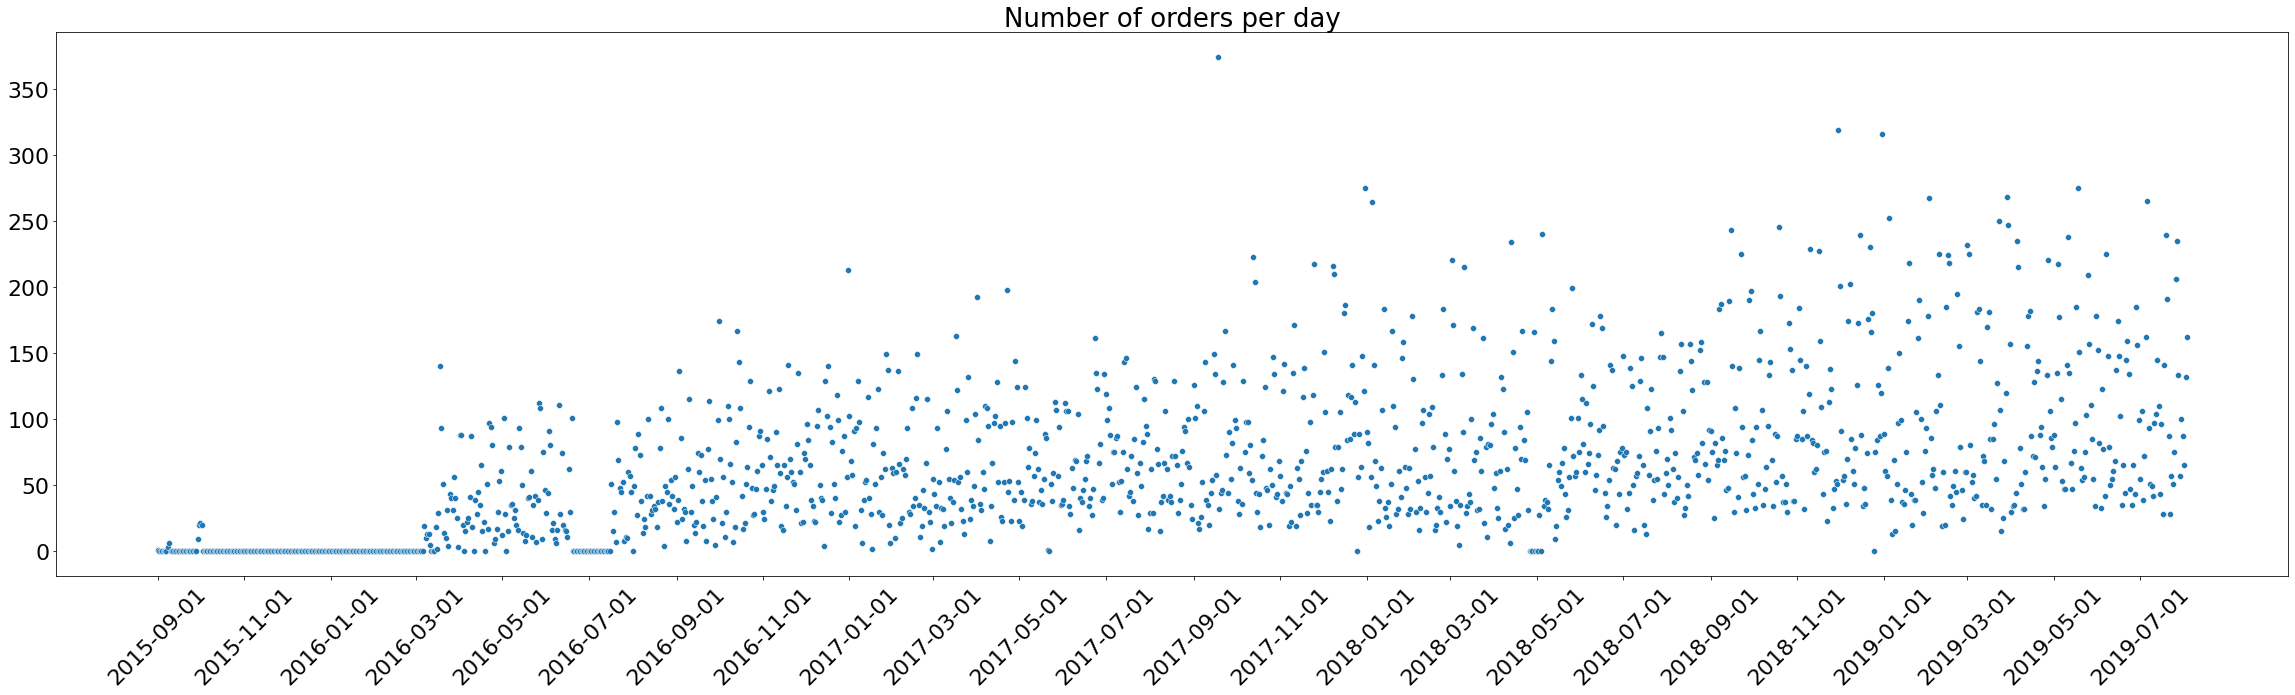

In [0]:
# Convert the Spark DataFrame to a Pandas DataFrame
df_pd = df.toPandas()

# Date needs to contain dataframe objects to use resample()
df_pd['Order Date'] = pd.to_datetime(df_pd['Order Date'])

#first we group orders by day, summing total products
df_pd = df_pd[['Order Date', 'Quantity']].resample('D', on='Order Date').sum().reset_index()

# Create a list of xticks using Pandas date_range (if needed)
year_ticks = pd.date_range(start=earliest, end=latest, freq='2MS')

# Plotting with seaborn
plt.figure(figsize=(40, 10))
fig = sns.scatterplot(x=df_pd['Order Date'], y=df_pd['Quantity'])

# Set the x-ticks (this assumes your x-axis uses datetime objects)
#plt.xticks([])  # rotation is optional, for better readability
plt.xticks(year_ticks, rotation=45, fontsize=22)
plt.yticks(fontsize=22)
# Remove the tick marks (small lines) next to the numbers
plt.title("Number of orders per day", fontsize=26)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

The graphs shows that there are inconsistencies for the earliest dates, mostly in year 2015 and in the summer of 2016.

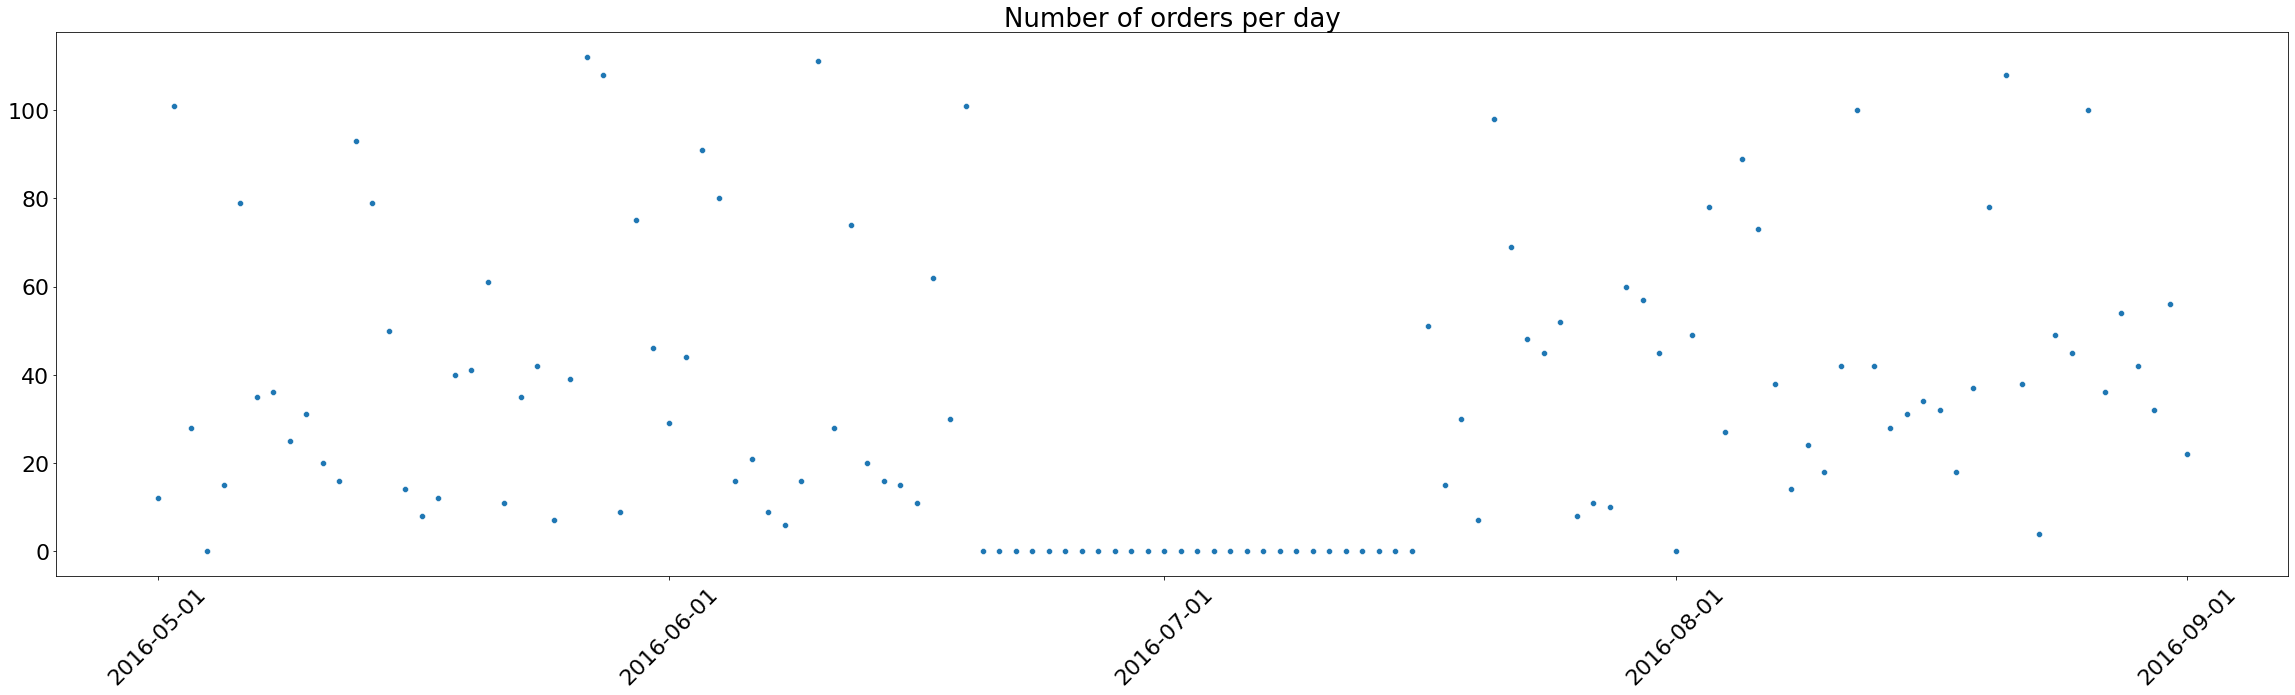

In [0]:
# Define your date boundaries (make sure they are in a comparable format)
date1 = "2016-05-01"
date2 = "2016-09-01"

# Filter the DataFrame to include only rows between date1 and date2,
# then group by "Date", count, and order the results.
df_pd1 = (
    df.filter((col("Order Date") >= date1) & (col("Order Date") <= date2))
)

# Convert the Spark DataFrame to a Pandas DataFrame
df_pd1 = df_pd1.toPandas()

# Date needs to contain dataframe objects to use resample()
df_pd1['Order Date'] = pd.to_datetime(df_pd1['Order Date'])

#first we group orders by day, summing total products
df_pd1 = df_pd1[['Order Date', 'Quantity']].resample('D', on='Order Date').sum().reset_index()

# Create a list of xticks using Pandas date_range (if needed)
year_ticks = pd.date_range(start=date1, end=date2, freq='1MS')

# Plotting with seaborn
plt.figure(figsize=(40, 10))
fig = sns.scatterplot(x=df_pd1['Order Date'], y=df_pd1['Quantity'])

# Set the x-ticks (this assumes your x-axis uses datetime objects)
#plt.xticks([])  # rotation is optional, for better readability
plt.xticks(year_ticks, rotation=45, fontsize=22)
plt.yticks(fontsize=22)

# Remove the tick marks (small lines) next to the numbers
plt.title("Number of orders per day", fontsize=26)
plt.xlabel(None)
plt.ylabel(None)
plt.show()



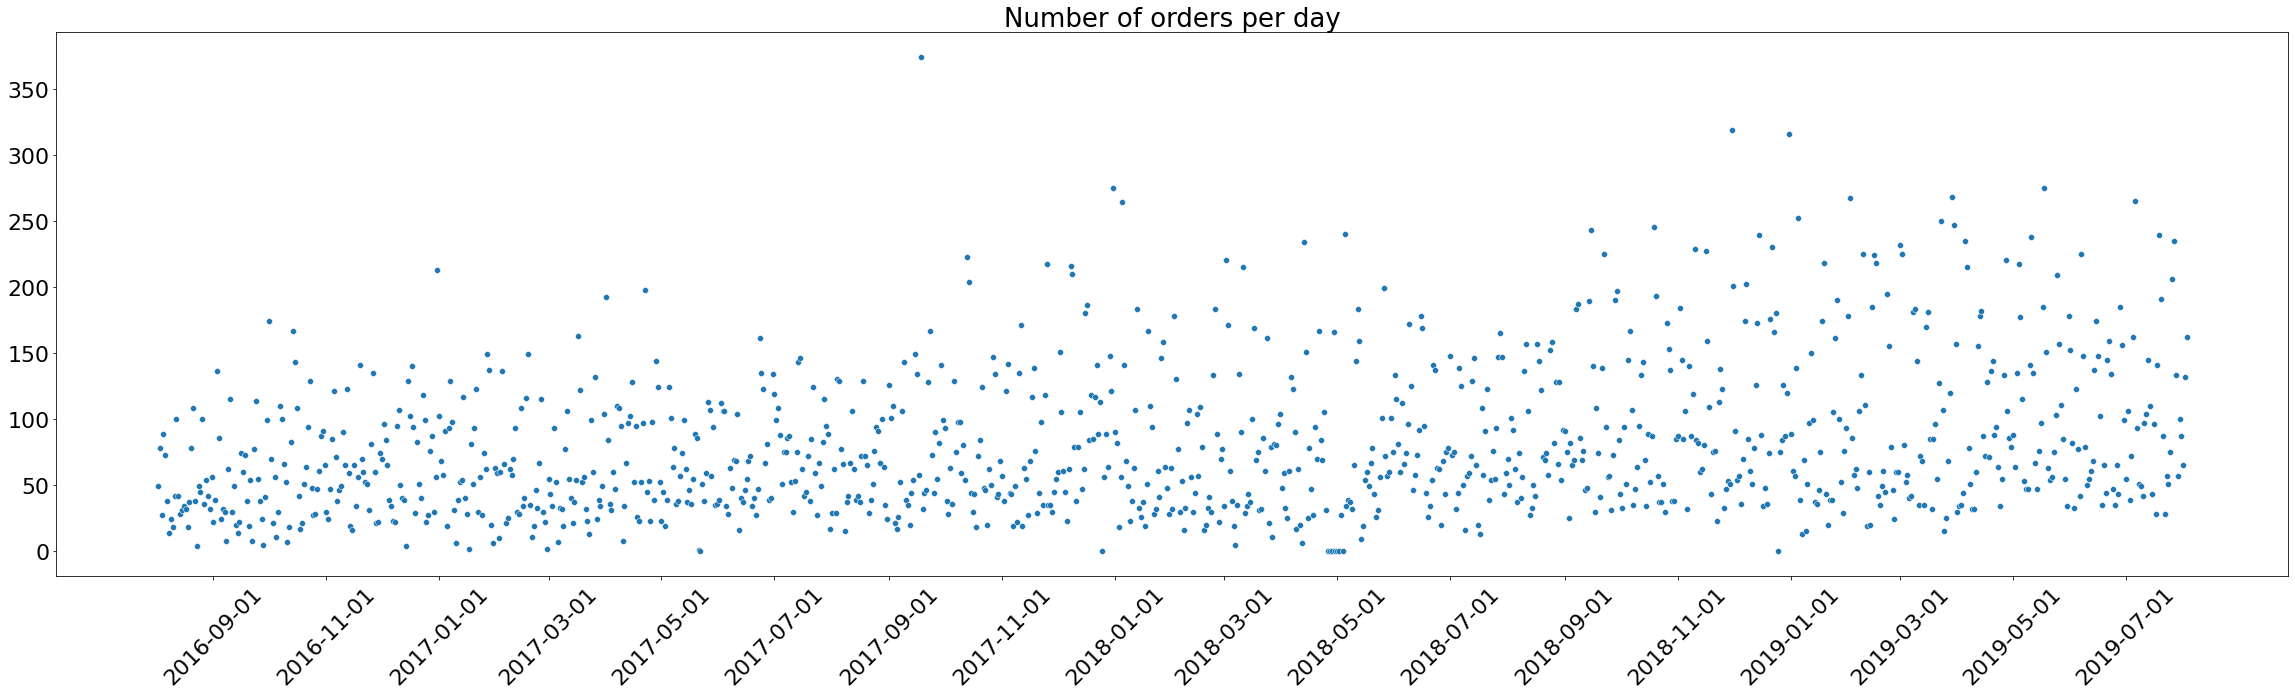

In [0]:
# Define your date boundaries (make sure they are in a comparable format)
start_date = "2016-08-01"

# Filter the DataFrame to include only rows after start_date,
# then group by "Date", count, and order the results.
df_F = (
    df.filter((col("Order Date") >= start_date))
)

# Calculate new min and max dates
min_df = df_F.select(date_format(min(col("Order Date")), "yyyy-MM-dd").alias("min_date"))
max_df = df_F.select(date_format(max(col("Order Date")), "yyyy-MM-dd").alias("max_date"))

earliest = min_df.collect()[0]['min_date']
latest = max_df.collect()[0]['max_date']

# Convert the Spark DataFrame to a Pandas DataFrame
df_F = df_F.toPandas()

# Date needs to contain dataframe objects to use resample()
df_F['Order Date'] = pd.to_datetime(df_F['Order Date'])

#first we group orders by day, summing total products
df_F = df_F[['Order Date', 'Quantity']].resample('D', on='Order Date').sum().reset_index()

# Create a list of xticks using Pandas date_range (if needed)
year_ticks = pd.date_range(start=earliest, end=latest, freq='2MS')

# Plotting with seaborn
plt.figure(figsize=(40, 10))
fig = sns.scatterplot(x=df_F['Order Date'], y=df_F['Quantity'])

# Set the x-ticks (this assumes your x-axis uses datetime objects)
#plt.xticks([])  # rotation is optional, for better readability
plt.xticks(year_ticks, rotation=45, fontsize=22)
plt.yticks(fontsize=22)

# Remove the tick marks (small lines) next to the numbers
plt.title("Number of orders per day", fontsize=26)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Creating weakly averages

In [0]:
orders = df_F[["Order Date", "Quantity"]]
orders = orders.groupby([pd.Grouper(key='Order Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Order Date')

#Add Seasonality features
orders['Week'] = orders['Order Date'].dt.isocalendar().week
orders['Month'] = orders['Order Date'].dt.month

#Add past volume features
for i in range (1,15):
    label = "Quantity_" + str(i)
    orders[label] = orders['Quantity'].shift(i)
    label = "Average_" + str(i)
    orders[label] = orders['Quantity'].rolling(i).mean()
orders = orders.dropna()

#one hot encode orders using pandas get_dummies
for column in ['Week','Month']:
    tempdf = pd.get_dummies(orders[column], prefix=column)
    orders = pd.merge(
        left=orders,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    orders = orders.drop(columns=column)
orders.shape

Out[20]: (143, 94)

In [0]:
# Splitting the data into train (75%) and test (25%) data
# 75% of 143 is 107
train = orders[:107].drop('Order Date', axis = 1)
test = orders[107:].drop('Order Date', axis = 1)
xtrain = train.drop(['Quantity'], axis = 1)
xtest = test.drop(['Quantity'], axis = 1)
ytrain = train['Quantity']
ytest =test['Quantity']

### Building the model

In [0]:
# Initialize the model
model = XGBRegressor(n_estimators=500, learning_rate=0.01)

# Prepare the evaluation set (using training data for demonstration)
eval_set = [(xtrain, ytrain)]

# Fit the model with the evaluation metric and early stopping
model.fit(xtrain, ytrain, eval_set=eval_set, verbose=False)

# Make predictions on the test set
ypred = model.predict(xtest)

#display(ypred)

In [0]:
#First we add the results to our original dataframe, after first aligning the indexes
ypred = pd.Series(ypred)
eval_df = orders[107:].reset_index(drop = True)
eval_df['ypred'] = ypred
eval_df = eval_df[['Order Date','Quantity', 'ypred']]
#display(eval_df)

Out[26]: Text(0.5, 1.0, 'Total Sales')

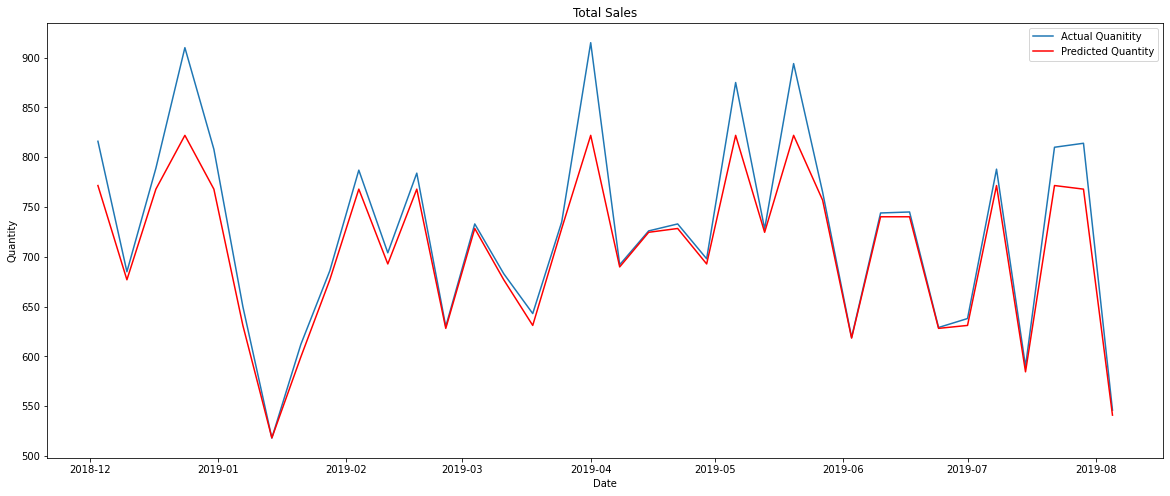

In [0]:
# Plotting the results of the train vs test sets
plt.figure(figsize = (20,8))
plt.plot(eval_df['Order Date'], eval_df['Quantity'], label = "Actual Quanitity")
plt.plot(eval_df['Order Date'], eval_df['ypred'], color = 'red', label = 'Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.title('Total Sales')

In [0]:
# DISPLAY metrics - mean_absolute_error, r2_score, mean_squared_log_error
print("Metrics for Total Sale\n")
print("Mean Absolute Error:\n", mean_absolute_error(ytest, ypred))
print("R Squared:\n", r2_score(ytest, ypred))
print("Mean Squared Log Error:\n", mean_squared_log_error(ytest, ypred))


Metrics for Total Sale

Mean Absolute Error:
 19.20262993706597
R Squared:
 0.8969090618945273
Mean Squared Log Error:
 0.0013732105872758815
